In [23]:
from keras import layers
from keras import models
from keras.datasets import mnist
import numpy as np
from keras.utils import to_categorical
import os,shutil
import PIL
import PIL.Image
from keras import optimizers
from keras import callbacks
from keras.utils import plot_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

W0822 03:42:14.107124 13864 deprecation_wrapper.py:119] From C:\Users\serge\Anaconda3\envs\KerasEnv\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0822 03:42:14.123134 13864 deprecation_wrapper.py:119] From C:\Users\serge\Anaconda3\envs\KerasEnv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0822 03:42:14.125139 13864 deprecation_wrapper.py:119] From C:\Users\serge\Anaconda3\envs\KerasEnv\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0822 03:42:14.137123 13864 deprecation_wrapper.py:119] From C:\Users\serge\Anaconda3\envs\KerasEnv\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [6]:
#stop fit if val_acc is droping after 1 epoch
#saving model to file, don't save if model hasn't improved on val_loss 
callback_list = [callbacks.EarlyStopping(monitor='val_acc', patience=5),
                callbacks.ModelCheckpoint(filepath='my_model.h5', monitor='val_loss', save_best_only=True)]

In [7]:
#accuracy must be as metric, because it is using in callbacks.EarlyStopping
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

W0822 03:42:14.252124 13864 deprecation_wrapper.py:119] From C:\Users\serge\Anaconda3\envs\KerasEnv\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0822 03:42:14.261124 13864 deprecation_wrapper.py:119] From C:\Users\serge\Anaconda3\envs\KerasEnv\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0822 03:42:14.267128 13864 deprecation.py:323] From C:\Users\serge\Anaconda3\envs\KerasEnv\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
#creating tensors for network from images
train_datagen = image.ImageDataGenerator(rescale=1./255)
test_datagen = image.ImageDataGenerator(rescale=1./255)

In [9]:
base_dir = 'C:/Python/keras_training/dogs-vs-cats/dogs-vs-cats_small'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

In [10]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=20,
                             validation_data=validation_generator,
                             validation_steps=50)

W0822 03:42:14.722380 13864 deprecation_wrapper.py:119] From C:\Users\serge\Anaconda3\envs\KerasEnv\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/20
100/100 [==============================] - 11s 109ms/step - loss: 0.6851 - acc: 0.5435 - val_loss: 0.6659 - val_acc: 0.5680
Epoch 2/20
100/100 [==============================] - 7s 68ms/step - loss: 0.6272 - acc: 0.6535 - val_loss: 0.6662 - val_acc: 0.6080
Epoch 3/20
100/100 [==============================] - 7s 68ms/step - loss: 0.5766 - acc: 0.6960 - val_loss: 0.6174 - val_acc: 0.6400
Epoch 4/20
100/100 [==============================] - 7s 68ms/step - loss: 0.5496 - acc: 0.7195 - val_loss: 0.5813 - val_acc: 0.6790
Epoch 5/20
100/100 [==============================] - 7s 68ms/step - loss: 0.5221 - acc: 0.7450 - val_loss: 0.5727 - val_acc: 0.6950
Epoch 6/20
100/100 [==============================] - 7s 66ms/step - loss: 0.4931 - acc: 0.7580 - val_loss: 0.5904 - val_acc: 0.6860
Epoch 7/20
100/100 [==============================] - 7s 68ms/step - loss: 0.4785 - acc: 0.7735 - val_loss: 0.5602 - val_acc: 0.7080
Epoch 8/20
100/100 [==============================] - 7s 70ms/step 

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

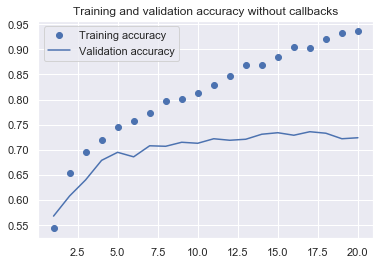

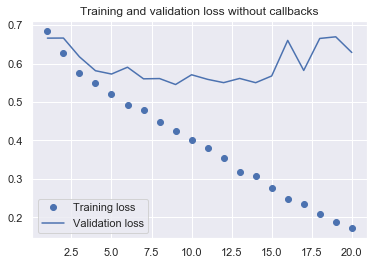

In [13]:
epochs = range(1,len(acc) + 1)
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy without callbacks')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss without callbacks')
plt.legend();

In [14]:
history_callback = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             callbacks=callback_list,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/100
100/100 [==============================] - 7s 68ms/step - loss: 0.1462 - acc: 0.9500 - val_loss: 0.6598 - val_acc: 0.7450
Epoch 2/100
100/100 [==============================] - 7s 68ms/step - loss: 0.1400 - acc: 0.9535 - val_loss: 0.7286 - val_acc: 0.7300
Epoch 3/100
100/100 [==============================] - 7s 67ms/step - loss: 0.1159 - acc: 0.9600 - val_loss: 0.7924 - val_acc: 0.7290
Epoch 4/100
100/100 [==============================] - 7s 68ms/step - loss: 0.0999 - acc: 0.9735 - val_loss: 0.7703 - val_acc: 0.7360
Epoch 5/100
100/100 [==============================] - 7s 72ms/step - loss: 0.0889 - acc: 0.9725 - val_loss: 0.8809 - val_acc: 0.7130
Epoch 6/100
100/100 [==============================] - 7s 69ms/step - loss: 0.0785 - acc: 0.9765 - val_loss: 0.7747 - val_acc: 0.7370


In [15]:
acc = history_callback.history['acc']
val_acc = history_callback.history['val_acc']
loss = history_callback.history['loss']
val_loss = history_callback.history['val_loss']

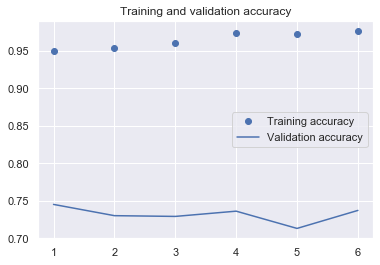

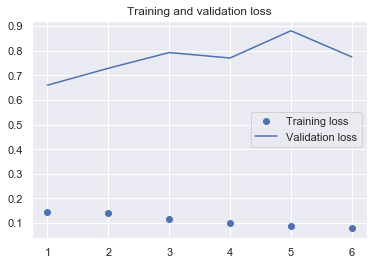

In [16]:
epochs = range(1,len(acc) + 1)
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend();

In [19]:
plot_model(model, show_shapes=True,to_file='model.png')

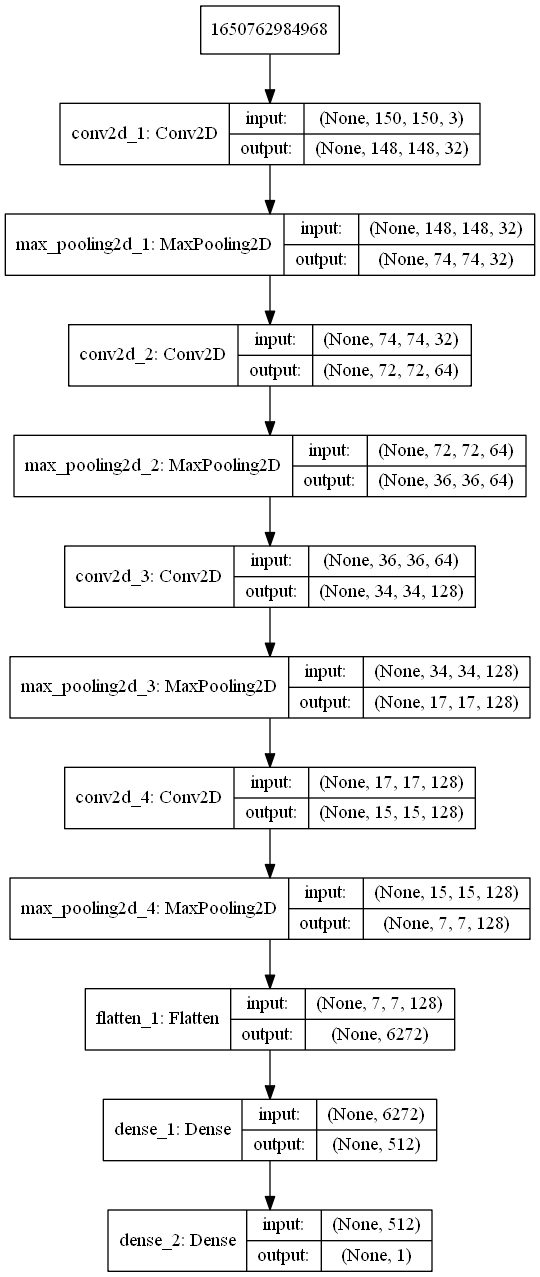

In [25]:
img = PIL.Image.open('model.png')
img